## 1) Dinâmica do pêndulo para tempos longos

##### a) Rode seu código da lista 5 para os parâmetros: $\omega _0 =2\pi$, $b=1/500$, $F=0$,  $\omega _e =0$, $v_0=0$ e  $x _0 =0.99999 \pi$. Considere o intervalo de tempo 0 < t < 500 com MUITOS pontos, pelo menos 100000.

Para isto, iremos reutilizar o código da lista 5 do pêndulo simples, sendo a equação:
$$ \dfrac{\partial ^2 x}{\partial t^2} = -\omega_0 ^2 \sin(x) - b.v + F.cos(\omega_e t) $$


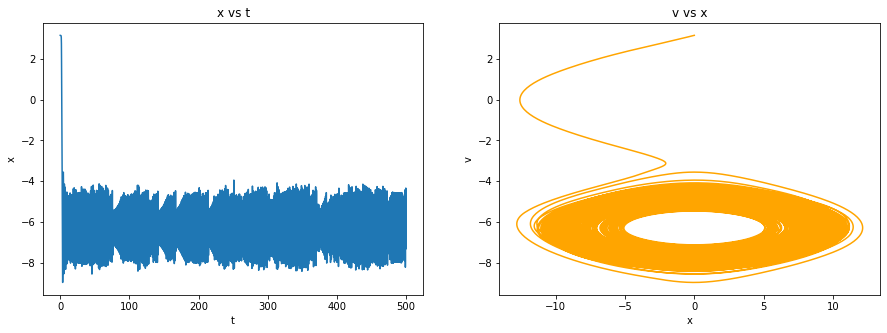

In [10]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Condições iniciais
x0 = 0.99999*np.pi
v0 = 0
ome = 2*np.pi
b=1/500 #Valores aleátórios de b, F e omega e
F=0
ome_e=0

#Definindo a função
def f(t, y):
    v = y[0]
    x = y[1]
    dvdt = -(ome **2)*np.sin(x) - b*v + F*np.cos(ome_e *t)
    dxdt = v
    return np.array([dvdt, dxdt])

#Solução da EDO
tlist=np.linspace(0, 500, 100000) # 0<t<500 com 100000 pontos
sol = solve_ivp(f, [0, 500], (v0, x0), method='RK45', t_eval=tlist, atol=1e-2, rtol=1e-2)
t=sol.t
v=sol.y[0]
x=sol.y[1]

#Plotando o gráfico
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1) 
plt.plot(t, x)
plt.title('x vs t')
plt.xlabel('t')
plt.ylabel('x')

plt.subplot(1, 2, 2) 
plt.plot(v, x, color='orange')
plt.title('v vs x')
plt.xlabel('x')
plt.ylabel('v')

plt.show()

##### b) Para obter boa precisão, precisará ajustar as variáveis rtol e atol do solve_ivp. O que estas variáveis controlam?

Estas variáveis são as tolerâncias relativas (rtol) e absolutas (atol), os valores padrão são 1e-3 para rtol e 1e-6 para atol. O solucionador mantém as estimativas de erro locais menores que atol + rtol * abs (y). O rtol controla uma precisão relativa (número de dígitos corretos), mas se um componente de y estiver aproximadamente abaixo de atol, o erro só precisa estar dentro do mesmo limite de atol.

##### c) Faça o gráfico da dinâmica x(t) vs t para todo o intervalo de tempo. Calcule a transformada de Fourier para obter x(w) e faça o gráfico do valor absoluto |x(w)| vs w.

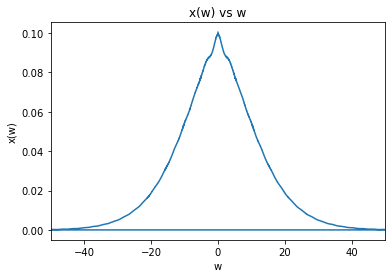

In [7]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from numpy import fft

# Condições iniciais
x0 = 0.99999*np.pi
v0 = 0
ome = 2*np.pi
b=1/500 #Valores aleátórios de b, F e omega e
F=0
ome_e=0

#Definindo a função
def f(t, y):
    v = y[0]
    x = y[1]
    dvdt = -(ome **2)*np.sin(x) - b*v + F*np.cos(ome_e *t)
    dxdt = v
    return np.array([dvdt, dxdt])

#Solução da EDO
N = 100000
tlist=np.linspace(0, 500, N+1) # 0<t<500 com 100001 pontos
sol = solve_ivp(f, [0, 500], (v0, x0), method='RK45', t_eval=tlist, atol=1e-2, rtol=1e-2)
t=sol.t
v=sol.y[0]
x=sol.y[1]

#Transformada de Fourier
L = 500
dx = L/N
w = fft.fftfreq(N+1)*2*np.pi/dx
phase = np.exp(1j*w*(-L/2))
norma = dx/np.sqrt(2*np.pi)
f = np.exp(-(x)**2/2)
F = phase*norma*fft.fft(f, norm='backward')


#Plotando o gráfico
plt.plot(w, np.abs(F))
plt.xlim(-50, 50)
plt.title('x(w) vs w')
plt.xlabel('w')
plt.ylabel('x(w)')

plt.show()

##### d) Faça o gráfico x(t) vs t para o intervalo de tempo 0 < t < 20. Tome a transformada de Fourier limitando os dados a apenas este intervalo e faça o gráfico |x(w)| vs w.

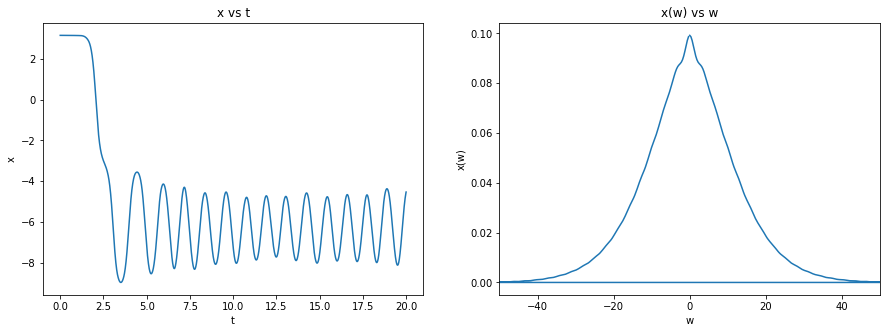

In [4]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from numpy import fft

# Condições iniciais
x0 = 0.99999*np.pi
v0 = 0
ome = 2*np.pi
b=1/500 #Valores aleátórios de b, F e omega e
F=0
ome_e=0

#Definindo a função
def f(t, y):
    v = y[0]
    x = y[1]
    dvdt = -(ome **2)*np.sin(x) - b*v + F*np.cos(ome_e *t)
    dxdt = v
    return np.array([dvdt, dxdt])

#Solução da EDO
N = 100000
tlist=np.linspace(0, 20, N+1) # 0<t<20 com 100001 pontos
sol = solve_ivp(f, [0, 20], (v0, x0), method='RK45', t_eval=tlist, atol=1e-2, rtol=1e-2)
t=sol.t
v=sol.y[0]
x=sol.y[1]

#Transformada de Fourier
L = 20
dx = L/N
w = fft.fftfreq(N+1)*2*np.pi/dx
phase = np.exp(1j*w*(-L/2))
norma = dx/np.sqrt(2*np.pi)
f = np.exp(-(x)**2/2)
F = phase*norma*fft.fft(f, norm='backward')


#Plotando o gráfico
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1) 
plt.plot(t, x)
plt.title('x vs t')
plt.xlabel('t')
plt.ylabel('x')

plt.subplot(1, 2, 2) 
plt.plot(w, np.abs(F))
plt.xlim(-50, 50)
plt.title('x(w) vs w')
plt.xlabel('w')
plt.ylabel('x(w)')

plt.show()

##### e) Faça o mesmo que no item (d), mas para o intervalo 490 < t < 500.

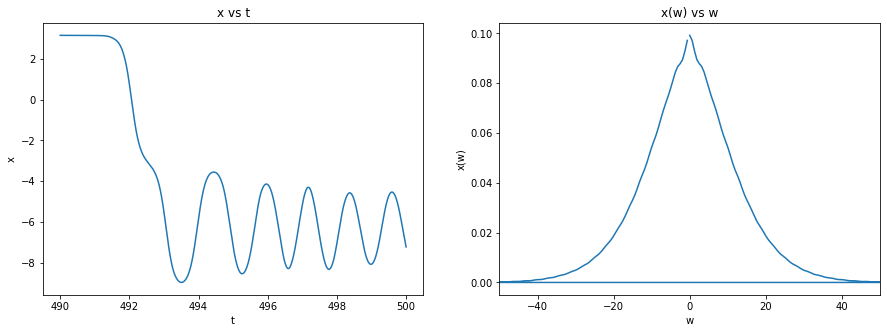

In [5]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from numpy import fft

# Condições iniciais
x0 = 0.99999*np.pi
v0 = 0
ome = 2*np.pi
b=1/500 #Valores aleátórios de b, F e omega e
F=0
ome_e=0

#Definindo a função
def f(t, y):
    v = y[0]
    x = y[1]
    dvdt = -(ome **2)*np.sin(x) - b*v + F*np.cos(ome_e *t)
    dxdt = v
    return np.array([dvdt, dxdt])

#Solução da EDO
N = 100000
tlist=np.linspace(490, 500, N+1) # 490<t<500 com 100001 pontos
sol = solve_ivp(f, [490, 500], (v0, x0), method='RK45', t_eval=tlist, atol=1e-2, rtol=1e-2)
t=sol.t
v=sol.y[0]
x=sol.y[1]

#Transformada de Fourier
L = 10
dx = L/N
w = fft.fftfreq(N+1)*2*np.pi/dx
phase = np.exp(1j*w*(-L/2))
norma = dx/np.sqrt(2*np.pi)
f = np.exp(-(x)**2/2)
F = phase*norma*fft.fft(f, norm='backward')


#Plotando o gráfico
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1) 
plt.plot(t, x)
plt.title('x vs t')
plt.xlabel('t')
plt.ylabel('x')

plt.subplot(1, 2, 2) 
plt.plot(w, np.abs(F))
plt.xlim(-50, 50)
plt.title('x(w) vs w')
plt.xlabel('w')
plt.ylabel('x(w)')

plt.show()

##### f) Compare os resultados das transformadas de Fourier dos itens (c), (d) e (e). Explique as diferenças. O que pode dizer do período das oscilações?

Podemos observar que a primeira transformada possui um aspecto mais largo na base, ao contrário da segunda e terceira transformada que que são semelhantes e sua base é fina como o pico. O período das oscilações varia muito ao longo do tempo, com momentos com oscilações pequenas e grandes, isso porque não há uma nenhuma força externa e o amortecimento é muito baixo b=1/500, logo as oscilações seguem quase que infinitamente com períodos que oscilam.